# DataFrame 접근 심화

* 기존처럼 하나씩 데이터 프레임에 접근하는 방식: <b>오래걸림</b><br>
→ <span style="color:red"><b>조건을 걸어 그룹단위</b></span>로 접근

In [4]:
import pandas as pd

lst = [['정찬빈', 19, '경영', '빅사', '회장'], ['정하영', 20, '사회', '빅사', '부회장'],
       ['김현재', 18, '컴공', '?', '교육팀장'], ['박찬호', 20, '중문', '빅데이터', '교육팀원'],
       ['안형준', 18, '미문', '경영', '교육팀원'], ['최준혁', 18, '경제', '빅사', '교육팀원']]

df = pd.DataFrame(lst, columns=['이름', '학번', '전공', '복수전공', '역할'])
df = df.set_index('이름')

df

,학번,전공,복수전공,역할
이름,,,,
정찬빈,19,경영,빅사,회장
정하영,20,사회,빅사,부회장
김현재,18,컴공,?,교육팀장
박찬호,20,중문,빅데이터,교육팀원
안형준,18,미문,경영,교육팀원
최준혁,18,경제,빅사,교육팀원


## 조건

18학번 인사이트 학회원 찾기

In [5]:
df.loc[df["학번"]==18]

,학번,전공,복수전공,역할
이름,,,,
김현재,18,컴공,?,교육팀장
안형준,18,미문,경영,교육팀원
최준혁,18,경제,빅사,교육팀원


18학번이고, 교육팀원인 인사이트 학회원 찾기

In [6]:
df.loc[(df["학번"]==18)&(df['역할']=="교육팀원")]

,학번,전공,복수전공,역할
이름,,,,
안형준,18,미문,경영,교육팀원
최준혁,18,경제,빅사,교육팀원


###### 18학번이 아니거나, 교육팀원이 아닌 인사이트 학회원

In [7]:
df.loc[~((df['학번'] == 18) | (df['역할'] == '교육팀원'))]

,학번,전공,복수전공,역할
이름,,,,
정찬빈,19,경영,빅사,회장
정하영,20,사회,빅사,부회장


→ <b>원하는 조건</b>에 맞는 데이터를 추출할 수 있다.<br>
<span style="color:gray">(공모전, 프로젝트 등에서 다루는 데이터는 크기가 방대하기 때문에 조건문으로 빠르게 접근하는 것이 좋다.)</span>

## 실습 1

전공이 경제이고, 역할이 교육팀원인 사람을 추출해주세요

***아래와 같은 결과가 나오면 됩니다!***

In [8]:
df.loc[(df["전공"] == "경제") & (df["역할"] == "교육팀원")]

,학번,전공,복수전공,역할
이름,,,,
최준혁,18,경제,빅사,교육팀원


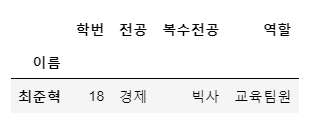

## Index

현재 조건문을 통해 추출한 데이터는 `DataFrame` 형식이다. &nbsp;즉, 여러가지 정보가 들어가 있다.<br>
만약 이 정보들을 <span style="color:red">대표할 수 있는 값</span>으로 데이터 프레임을 다룬다면 조금 더 빠르지 않을까?<br> ⇒&nbsp;&nbsp;&nbsp;&nbsp;<b>`Index`</b> 를 사용해보자!

### 추출

In [9]:
idx = df[df["복수전공"]=="빅사"].index
idx

Index(['정찬빈', '정하영', '최준혁'], dtype='object', name='이름')

추출한 index를 갖는 데이터 프레임 보기

In [10]:
df.loc[idx,] # df.loc[idx]   df.loc[idx,:]  :  이 두 가지 함수도 같은 결과

,학번,전공,복수전공,역할
이름,,,,
정찬빈,19,경영,빅사,회장
정하영,20,사회,빅사,부회장
최준혁,18,경제,빅사,교육팀원


### 수정

> sort

In [11]:
df

,학번,전공,복수전공,역할
이름,,,,
정찬빈,19,경영,빅사,회장
정하영,20,사회,빅사,부회장
김현재,18,컴공,?,교육팀장
박찬호,20,중문,빅데이터,교육팀원
안형준,18,미문,경영,교육팀원
최준혁,18,경제,빅사,교육팀원


by column을 기준으로 오름차순으로 정렬

In [12]:
df.sort_values(by="학번")

,학번,전공,복수전공,역할
이름,,,,
김현재,18,컴공,?,교육팀장
안형준,18,미문,경영,교육팀원
최준혁,18,경제,빅사,교육팀원
정찬빈,19,경영,빅사,회장
정하영,20,사회,빅사,부회장
박찬호,20,중문,빅데이터,교육팀원


In [13]:
# ascending=False 일시 내림차순으로 진행.
df.sort_values(by="학번", ascending=False)

,학번,전공,복수전공,역할
이름,,,,
정하영,20,사회,빅사,부회장
박찬호,20,중문,빅데이터,교육팀원
정찬빈,19,경영,빅사,회장
김현재,18,컴공,?,교육팀장
안형준,18,미문,경영,교육팀원
최준혁,18,경제,빅사,교육팀원


###### rename

In [14]:
df.rename(index = {"정찬빈":'정회장', '정하영':'정부회장'}, inplace=True)
df

,학번,전공,복수전공,역할
이름,,,,
정회장,19,경영,빅사,회장
정부회장,20,사회,빅사,부회장
김현재,18,컴공,?,교육팀장
박찬호,20,중문,빅데이터,교육팀원
안형준,18,미문,경영,교육팀원
최준혁,18,경제,빅사,교육팀원


###### reset_index(drop = True, inplace = False)

In [15]:
df=df.reset_index()
df

,이름,학번,전공,복수전공,역할
0,정회장,19,경영,빅사,회장
1,정부회장,20,사회,빅사,부회장
2,김현재,18,컴공,?,교육팀장
3,박찬호,20,중문,빅데이터,교육팀원
4,안형준,18,미문,경영,교육팀원
5,최준혁,18,경제,빅사,교육팀원


In [16]:
df.reset_index(drop=True)

,이름,학번,전공,복수전공,역할
0,정회장,19,경영,빅사,회장
1,정부회장,20,사회,빅사,부회장
2,김현재,18,컴공,?,교육팀장
3,박찬호,20,중문,빅데이터,교육팀원
4,안형준,18,미문,경영,교육팀원
5,최준혁,18,경제,빅사,교육팀원


In [17]:
df.reset_index(inplace=True)
df

,index,이름,학번,전공,복수전공,역할
0,0,정회장,19,경영,빅사,회장
1,1,정부회장,20,사회,빅사,부회장
2,2,김현재,18,컴공,?,교육팀장
3,3,박찬호,20,중문,빅데이터,교육팀원
4,4,안형준,18,미문,경영,교육팀원
5,5,최준혁,18,경제,빅사,교육팀원


## 활용

: 방대한 데이터를 다룰 경우, 가장 빠른 함수

##### 원하는 조건을 가진 사람만을 추출하기

In [18]:
bigsa = df[df['복수전공'] == '빅사']['이름']
df[df['이름'].isin(bigsa)]
#df['이름'].isin(bigsa)는 boolean 값을 반환합니다. 
#이때 앞에 df를 한번 더 씌움으로써 True인 값들만 dataframe 형태로 보여줍니다

,index,이름,학번,전공,복수전공,역할
0,0,정회장,19,경영,빅사,회장
1,1,정부회장,20,사회,빅사,부회장
5,5,최준혁,18,경제,빅사,교육팀원


In [19]:
business = df[df['전공'] == '경영']['이름']
business

0    정회장
Name: 이름, dtype: object

In [20]:
df[df['이름'].isin(business)]
#business내에 이름을 가지고 있는 사람을 출력

,index,이름,학번,전공,복수전공,역할
0,0,정회장,19,경영,빅사,회장


##### 원하는 조건을 가진 학번을 추출하기

In [21]:
number = df[df['복수전공'] == '빅사']['학번']
number

0    19
1    20
5    18
Name: 학번, dtype: int64

In [22]:
df[df['학번'].isin(number)]

,index,이름,학번,전공,복수전공,역할
0,0,정회장,19,경영,빅사,회장
1,1,정부회장,20,사회,빅사,부회장
2,2,김현재,18,컴공,?,교육팀장
3,3,박찬호,20,중문,빅데이터,교육팀원
4,4,안형준,18,미문,경영,교육팀원
5,5,최준혁,18,경제,빅사,교육팀원


###### 위의 두 조건을 모두 만족하는 데이터 보기

In [23]:
df[(df['이름'].isin(business)) & (df['학번'].isin(number))]

,index,이름,학번,전공,복수전공,역할
0,0,정회장,19,경영,빅사,회장


###### df. shift
###### 데이터 작업을 하다보면 다른 행과 계산할 경우 shift를 이용해 해결할 수 있습니다. 
###### for문으로 인덱스를 일일히 돌리지 않아도 되고 필요에 따라 컬럼을 추가해서 눈으로 확인해도 되지만,
###### 다른 행과 계산하려고 일일히 컬럼을 추가하는 번거로움을 줄일 수 있습니다.

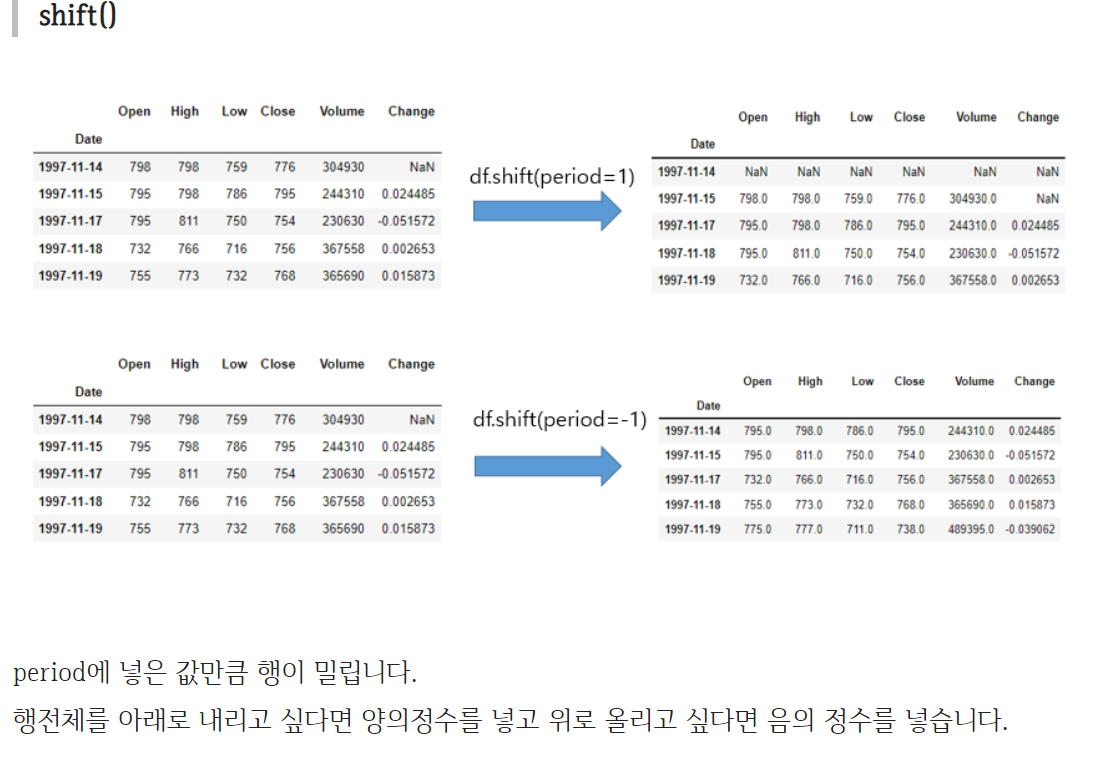

In [24]:
display(df) # row를 한줄 씩 이동.
display(df.shift(1))

,index,이름,학번,전공,복수전공,역할
0,0,정회장,19,경영,빅사,회장
1,1,정부회장,20,사회,빅사,부회장
2,2,김현재,18,컴공,?,교육팀장
3,3,박찬호,20,중문,빅데이터,교육팀원
4,4,안형준,18,미문,경영,교육팀원
5,5,최준혁,18,경제,빅사,교육팀원


,index,이름,학번,전공,복수전공,역할
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,정회장,19.0,경영,빅사,회장
2,1.0,정부회장,20.0,사회,빅사,부회장
3,2.0,김현재,18.0,컴공,?,교육팀장
4,3.0,박찬호,20.0,중문,빅데이터,교육팀원
5,4.0,안형준,18.0,미문,경영,교육팀원


###### 한 행이 밀려 새로만들어진 new df와 기존 df와 비교

In [25]:
new_df = (df == df.shift(1))
new_df

,index,이름,학번,전공,복수전공,역할
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,True,False,False,True


In [26]:
idx = new_df[new_df['복수전공'] == True].index
df.loc[idx]

,index,이름,학번,전공,복수전공,역할
1,1,정부회장,20,사회,빅사,부회장


>정부회장의 <b>`복수전공 정보가 직전 데이터`</b>와 유사한 정보를 갖고 있음을 알 수 있다.<br>
><span style="color:gray">shift()안의 숫자와 idx 조건문을 변형하여 더욱 다양하게 유사한 데이터들만을 추출할 수 있습니다.</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:blue">실제 프로젝트나 공모전에서는 이와 같이 Index Slicing을 활용하여, 데이터 분석 진행이 이루어진다고 합니다. </span>

## 실습2

<b>`isin`</b>을 활용하여 학번이 18이고, 복수전공이 빅사인 사람을 추출하라 

***아래와 같은 결과가 나오면 됩니다!***

In [27]:
bigsa1 = df[df['복수전공'] == '빅사']['이름']
print(bigsa1)
#df[df['이름'].isin(bigsa1)]

#number2 = df[df['복수전공'] == '빅사']['학번']
#df[df['학번'].isin(number2)]
number3 = df[df['학번']==18]['이름']
print(number3)
df[(df['이름'].isin(number3))&(df['이름'].isin(bigsa1))]

0     정회장
1    정부회장
5     최준혁
Name: 이름, dtype: object
2    김현재
4    안형준
5    최준혁
Name: 이름, dtype: object


,index,이름,학번,전공,복수전공,역할
5,5,최준혁,18,경제,빅사,교육팀원


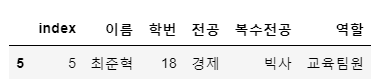

# DataFrame 병합 심화

In [28]:
info_dict = {
    '닉네임' : ['정회장', '하이영', '김나우', '찬호팍', '안녕준', '최준'],
    '학번' : [19, 20, 18, 18, 20, 18],
    '나이' : [26, 23, 26, 24, 26, 25]
}
info_df = pd.DataFrame(info_dict)
info_df

,닉네임,학번,나이
0,정회장,19,26
1,하이영,20,23
2,김나우,18,26
3,찬호팍,18,24
4,안녕준,20,26
5,최준,18,25


→ `info_df`는 6명의  닉네임, 학번, 나이를 담은 데이터이다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`info_df`를 기존의 `df`와 합쳐보자!

## pd.concat()

: 데이터프레임을 물리적으로 이어 붙여주는 함수

In [29]:
df

,index,이름,학번,전공,복수전공,역할
0,0,정회장,19,경영,빅사,회장
1,1,정부회장,20,사회,빅사,부회장
2,2,김현재,18,컴공,?,교육팀장
3,3,박찬호,20,중문,빅데이터,교육팀원
4,4,안형준,18,미문,경영,교육팀원
5,5,최준혁,18,경제,빅사,교육팀원


In [30]:
info_df

,닉네임,학번,나이
0,정회장,19,26
1,하이영,20,23
2,김나우,18,26
3,찬호팍,18,24
4,안녕준,20,26
5,최준,18,25


In [31]:
#default 값은 행으로 합쳐진다.
pd.concat([df, info_df]) 

,index,이름,학번,전공,복수전공,역할,닉네임,나이
0,0.0,정회장,19,경영,빅사,회장,NaN,NaN
1,1.0,정부회장,20,사회,빅사,부회장,NaN,NaN
2,2.0,김현재,18,컴공,?,교육팀장,NaN,NaN
3,3.0,박찬호,20,중문,빅데이터,교육팀원,NaN,NaN
4,4.0,안형준,18,미문,경영,교육팀원,NaN,NaN
5,5.0,최준혁,18,경제,빅사,교육팀원,NaN,NaN
0,NaN,NaN,19,NaN,NaN,NaN,정회장,26.0
1,NaN,NaN,20,NaN,NaN,NaN,하이영,23.0
2,NaN,NaN,18,NaN,NaN,NaN,김나우,26.0
3,NaN,NaN,18,NaN,NaN,NaN,찬호팍,24.0


→ default 값으로 <b>`axis = 0`</b>이 적용되므로 행 방향(위아래)으로 두 데이터프레임을 이어붙인다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;그런데, 기존 `df`에는 나이 컬럼이 없고, `info_df`에는 전공, 복수전공, 역할 컬럼이 없으므로 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`NaN` 값이 채워진 것을 알 수 있다.

In [32]:
pd.concat([df, info_df], axis = 1)

,index,이름,학번,전공,복수전공,역할,닉네임,학번,나이
0,0,정회장,19,경영,빅사,회장,정회장,19,26
1,1,정부회장,20,사회,빅사,부회장,하이영,20,23
2,2,김현재,18,컴공,?,교육팀장,김나우,18,26
3,3,박찬호,20,중문,빅데이터,교육팀원,찬호팍,18,24
4,4,안형준,18,미문,경영,교육팀원,안녕준,20,26
5,5,최준혁,18,경제,빅사,교육팀원,최준,18,25


> 단순히 이어붙이는 방식이기 때문에 적절하게 이어지지 않는 문제가 발생한다. <br>
> `pd.concat()`은 데이터의 구조가 같은 경우에만 유용하게 사용될 수 있다.<br>
> 위의 문제를 해결하기 위해서는?<br>

## pd.merge()

: 두 데이터프레임을 각 데이터에 존재하는 고유값(key)을 기준으로 병합할때 사용! \
pd.merge의 default는 다음과 같습니다.

```python
pd.merge(df_left, df_right, how='inner', on=None)
```

In [33]:
# df와 info_df의 교집합을 출력

pd.merge(df, info_df, how = 'inner', left_on = '이름', right_on = '닉네임')

,index,이름,학번_x,전공,복수전공,역할,닉네임,학번_y,나이
0,0,정회장,19,경영,빅사,회장,정회장,19,26


In [34]:
# 모든 데이터 출력, 어느 한쪽에라도 없는 데이터가 있는 경우 NaN값이 지정됨

pd.merge(df, info_df, how = 'outer', left_on = '이름', right_on = '닉네임')

,index,이름,학번_x,전공,복수전공,역할,닉네임,학번_y,나이
0,0.0,정회장,19.0,경영,빅사,회장,정회장,19.0,26.0
1,1.0,정부회장,20.0,사회,빅사,부회장,NaN,NaN,NaN
2,2.0,김현재,18.0,컴공,?,교육팀장,NaN,NaN,NaN
3,3.0,박찬호,20.0,중문,빅데이터,교육팀원,NaN,NaN,NaN
4,4.0,안형준,18.0,미문,경영,교육팀원,NaN,NaN,NaN
5,5.0,최준혁,18.0,경제,빅사,교육팀원,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,하이영,20.0,23.0
7,NaN,NaN,NaN,NaN,NaN,NaN,김나우,18.0,26.0
8,NaN,NaN,NaN,NaN,NaN,NaN,찬호팍,18.0,24.0
9,NaN,NaN,NaN,NaN,NaN,NaN,안녕준,20.0,26.0


In [35]:
# info_df에는 없지만 df에 있는 데이터도 출력

pd.merge(df, info_df, how = 'left', left_on = '이름', right_on = '닉네임')

,index,이름,학번_x,전공,복수전공,역할,닉네임,학번_y,나이
0,0,정회장,19,경영,빅사,회장,정회장,19.0,26.0
1,1,정부회장,20,사회,빅사,부회장,NaN,NaN,NaN
2,2,김현재,18,컴공,?,교육팀장,NaN,NaN,NaN
3,3,박찬호,20,중문,빅데이터,교육팀원,NaN,NaN,NaN
4,4,안형준,18,미문,경영,교육팀원,NaN,NaN,NaN
5,5,최준혁,18,경제,빅사,교육팀원,NaN,NaN,NaN


df와 info_df를 '이름'과 '학번'을 기준으로 Right Outer Join 하기

In [36]:
pd.merge(df, info_df, how = "right", on="학번")

,index,이름,학번,전공,복수전공,역할,닉네임,나이
0,0,정회장,19,경영,빅사,회장,정회장,26
1,1,정부회장,20,사회,빅사,부회장,하이영,23
2,3,박찬호,20,중문,빅데이터,교육팀원,하이영,23
3,2,김현재,18,컴공,?,교육팀장,김나우,26
4,4,안형준,18,미문,경영,교육팀원,김나우,26
5,5,최준혁,18,경제,빅사,교육팀원,김나우,26
6,2,김현재,18,컴공,?,교육팀장,찬호팍,24
7,4,안형준,18,미문,경영,교육팀원,찬호팍,24
8,5,최준혁,18,경제,빅사,교육팀원,찬호팍,24
9,1,정부회장,20,사회,빅사,부회장,안녕준,26


In [37]:
# 아래와 같은 결과가 나오면 됩니다!
pd.merge(df, info_df, how = "right", left_on = ["이름","학번"], right_on=["닉네임","학번"])

,index,이름,학번,전공,복수전공,역할,닉네임,나이
0,0.0,정회장,19,경영,빅사,회장,정회장,26
1,NaN,NaN,20,NaN,NaN,NaN,하이영,23
2,NaN,NaN,18,NaN,NaN,NaN,김나우,26
3,NaN,NaN,18,NaN,NaN,NaN,찬호팍,24
4,NaN,NaN,20,NaN,NaN,NaN,안녕준,26
5,NaN,NaN,18,NaN,NaN,NaN,최준,25


# DataFrame 그룹핑 심화

In [38]:
score_dict = {
    '이름' : ['최윤아', '최윤아', '최윤아', '심규환', '심규환', '심규환', '전종윤', '전종윤', '전종윤', 
            '오재은', '오재은', '오재은', '김재학', '김재학', '김재학', '손채현', '손채현', '손채현', '최윤서','최윤서','최윤서'],
    '학번' : [18, 18, 18, 19, 19, 19, 18, 18, 18, 20, 20, 20, 22, 22, 22, 20, 20, 20, 20, 20, 20],
    '과목' : ['빅데이터학', '통계자료분석', '계량경제학', '빅데이터학', '통계자료분석', 'Data&AI', '빅데이터학', '통계자료분석', 'Data&AI',
           '통계자료분석', 'Data&AI', '계량경제학', '빅데이터학', '통계자료분석', '계량경제학', '빅데이터학', 'Data&AI', '계량경제학', "빅데이터학", "통계자료분석", "Data&AI"],
    '중간고사' : [50, 60, 95, 70, 55, 85, 75, 60, 80, 85, 45, 90, 70, 65, 90, 50, 80, 40, 50, 65, 75],
    '기말고사' : [45, 75, 100, 80, 55, 90, 85, 65, 95, 75, 50, 95, 70, 70, 100, 55, 95, 45, 80, 75, 65],
    '분반' : [1, 2, 4, 1, 3, 2, 2, 2, 3, 1, 3, 5, 1, 1, 5, 2, 1, 5, 1, 3, 5]
}
score_df = pd.DataFrame(score_dict)
score_df

,이름,학번,과목,중간고사,기말고사,분반
0,최윤아,18,빅데이터학,50,45,1
1,최윤아,18,통계자료분석,60,75,2
2,최윤아,18,계량경제학,95,100,4
3,심규환,19,빅데이터학,70,80,1
4,심규환,19,통계자료분석,55,55,3
5,심규환,19,Data&AI,85,90,2
6,전종윤,18,빅데이터학,75,85,2
7,전종윤,18,통계자료분석,60,65,2
8,전종윤,18,Data&AI,80,95,3
9,오재은,20,통계자료분석,85,75,1


## df.group.by()

In [39]:
score_df.groupby('이름')

groupby 객체가 리턴된다! (아무것도 못함😥)<br>
→  <b>`df.groupby('컬럼명').함수()`</b> 그루핑 후 추가적인 함수(집계함수)를 사용하여 원하는 값을 조회할 수 있음

In [40]:
score_df.groupby('이름')["중간고사"].mean()

이름
김재학    75.000000
손채현    56.666667
심규환    70.000000
오재은    73.333333
전종윤    71.666667
최윤서    63.333333
최윤아    68.333333
Name: 중간고사, dtype: float64

### 개수: count()

In [41]:
# 과목별 수강 인원
# Series

score_df.groupby('과목')['중간고사'].count()  

과목
Data&AI    5
계량경제학      4
빅데이터학      6
통계자료분석     6
Name: 중간고사, dtype: int64

In [42]:
# 과목별 수강 인원
# DataFrame

score_df.groupby('과목')['이름'].count().to_frame()  

,이름
과목,
Data&AI,5
계량경제학,4
빅데이터학,6
통계자료분석,6


### 합계 sum()

In [43]:
# 학생별 시험 성적 합계

display(score_df.groupby('이름')[['중간고사', '기말고사']].sum())
#중간고사 성적을 기준으로 내림차순
display(score_df.groupby('이름')[['중간고사', '기말고사']].sum().sort_values(by = '중간고사', ascending = False))

,중간고사,기말고사
이름,,
김재학,225,240
손채현,170,195
심규환,210,225
오재은,220,220
전종윤,215,245
최윤서,190,220
최윤아,205,220


,중간고사,기말고사
이름,,
김재학,225,240
오재은,220,220
전종윤,215,245
심규환,210,225
최윤아,205,220
최윤서,190,220
손채현,170,195


### 최대/최소: max() min()

In [44]:
# 과목별 중간고사 성적 최대값

score_df.groupby('과목')[['중간고사']].max()

,중간고사
과목,
Data&AI,85
계량경제학,95
빅데이터학,75
통계자료분석,85


In [45]:
# 과목별 기말고사 성적 최소값

score_df.groupby('과목')[['기말고사']].min()

,기말고사
과목,
Data&AI,50
계량경제학,45
빅데이터학,45
통계자료분석,55


### 평균/중앙값: mean() median()

In [46]:
score_df.groupby('과목')[['중간고사', '기말고사']].mean()

,중간고사,기말고사
과목,,
Data&AI,73.000000,79.000000
계량경제학,78.750000,85.000000
빅데이터학,60.833333,69.166667
통계자료분석,65.000000,69.166667


In [47]:
score_df.groupby('과목')[['중간고사', '기말고사']].median()

,중간고사,기말고사
과목,,
Data&AI,80.0,90.0
계량경제학,90.0,97.5
빅데이터학,60.0,75.0
통계자료분석,62.5,72.5


이 외에도 표준편차 `std()`, 분산 `var()`, 분위수 `quantile()` 등의 집계함수가 있습니다.

## 여러 개의 컬럼을 기준으로 그룹핑하려면? (Multi Index)
`df.groupby(['컬럼명1','컬럼명2'])`

In [48]:
score_df.groupby(['과목', '분반'])[['중간고사', '기말고사']].sum()

중간고사  기말고사
과목      분반            
Data&AI 1     80    95
        2     85    90
        3    125   145
        5     75    65
계량경제학   4     95   100
        5    220   240
빅데이터학   1    240   275
        2    125   140
통계자료분석  1    150   145
        2    120   140
        3    120   130

## 여러 개의 집계함수를 사용하려면?
`df.groupby('컬럼명').agg([함수1, 함수2, ...])`

In [49]:
score_df.groupby('과목')[['중간고사', '기말고사']].agg(['count', 'sum', 'max', 'min', 'mean', 'median'])

중간고사                                 기말고사                           \
        count  sum max min       mean median count  sum  max min       mean   
과목                                                                            
Data&AI     5  365  85  45  73.000000   80.0     5  395   95  50  79.000000   
계량경제학       4  315  95  40  78.750000   90.0     4  340  100  45  85.000000   
빅데이터학       6  365  75  50  60.833333   60.0     6  415   85  45  69.166667   
통계자료분석      6  390  85  55  65.000000   62.5     6  415   75  55  69.166667   

                
        median  
과목              
Data&AI   90.0  
계량경제학     97.5  
빅데이터학     75.0  
통계자료분석    72.5

## 집계함수 이외에 사용할 수 있는 함수의 예

In [50]:
# 학생별 수강 과목

score_df.groupby('이름')['과목'].unique().to_frame()

,과목
이름,
김재학,"[빅데이터학, 통계자료분석, 계량경제학]"
손채현,"[빅데이터학, Data&AI, 계량경제학]"
심규환,"[빅데이터학, 통계자료분석, Data&AI]"
오재은,"[통계자료분석, Data&AI, 계량경제학]"
전종윤,"[빅데이터학, 통계자료분석, Data&AI]"
최윤서,"[빅데이터학, 통계자료분석, Data&AI]"
최윤아,"[빅데이터학, 통계자료분석, 계량경제학]"


## 실습3
학번별 중간고사와 기말고사의 평균, 최댓값이 하나의 데이터프레임 안에 들어오도록 만드세요!

> 아래와 같은 그림이 나오게 해주세요!

In [51]:
score_df.groupby('학번')[['중간고사','기말고사']].agg(['mean','max'])

중간고사           기말고사     
         mean max       mean  max
학번                               
18  70.000000  95  77.500000  100
19  70.000000  85  75.000000   90
20  64.444444  90  70.555556   95
22  75.000000  90  80.000000  100

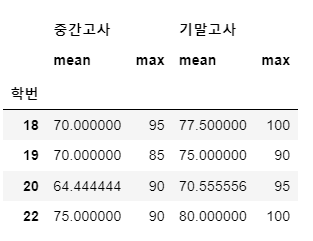

##### score_df.groupby("학번")[['중간고사','기말고사']].agg(['mean', 'max']).to_frame()
##### 프레임을 또 프레임을 씌운것..

# DataFrame 변형 심화

## pivot_table
- 데이터의 두 개의 컬럼을 행/열 인덱스로 써서 데이터를 재구조화한 테이블
 
 
- 엑셀의 pivot_table 기능처럼 사용
```python
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, dropna=True, margins=False, margins_name='All')
df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, dropna=True, margins=False, margins_name='All')
```
- values : 통계함수를 적용할 데이터프레임의 특정 컬럼
 
    
- index : 그룹화의 첫 번째 기준으로, 피벗테이블의 index로 가져올 데이터프레임의 특정 컬럼(두 개 이상이면 list로)
 
    
- columns : 그룹화의 두 번째 기준으로, 피벗테이블의 columns로 가져올 데이터프레임의 특정 컬럼(두 개 이상이면 list로)


- aggfunc : 2개의 그룹화 기준으로 values의 특정 컬럼에 적용시킬 통계함수 (default : mean)


- fill_value : NaN의 대체값


- dropna : values가 전부 NaN인 행/열의 삭제 여부


- margins : 모든 데이터를 분석한 결과(=마진)를 마지막 행/열에 붙일지 여부


- margins_name: 마진 행/열의 이름

In [52]:
# 과목과 분반으로 그룹화

score_df.pivot_table(index = ['과목', '분반']).round()

기말고사  중간고사    학번
과목      분반                   
Data&AI 1    95.0  80.0  20.0
        2    90.0  85.0  19.0
        3    72.0  62.0  19.0
        5    65.0  75.0  20.0
계량경제학   4   100.0  95.0  18.0
        5    80.0  73.0  21.0
빅데이터학   1    69.0  60.0  20.0
        2    70.0  62.0  19.0
통계자료분석  1    72.0  75.0  21.0
        2    70.0  60.0  18.0
        3    65.0  60.0  20.0

In [53]:
# 과목과 분반으로 그룹화하고 중간고사와 기말고사의 최대값 조회 

score_df.pivot_table(index = ['과목', '분반'], values = ['중간고사', '기말고사'], aggfunc = 'max')

기말고사  중간고사
과목      분반            
Data&AI 1     95    80
        2     90    85
        3     95    80
        5     65    75
계량경제학   4    100    95
        5    100    90
빅데이터학   1     80    70
        2     85    75
통계자료분석  1     75    85
        2     75    60
        3     75    65

In [54]:
# 과목으로 그룹화하고 분반을 구분해서 중간고사와 기말고사의 평균값 조회 

score_df.pivot_table(index = '과목', columns = '분반', values = ['중간고사', '기말고사'], aggfunc = 'mean')

기말고사                           중간고사                             
분반           1     2     3      4     5     1     2     3     4          5
과목                                                                        
Data&AI  95.00  90.0  72.5    NaN  65.0  80.0  85.0  62.5   NaN  75.000000
계량경제학      NaN   NaN   NaN  100.0  80.0   NaN   NaN   NaN  95.0  73.333333
빅데이터학    68.75  70.0   NaN    NaN   NaN  60.0  62.5   NaN   NaN        NaN
통계자료분석   72.50  70.0  65.0    NaN   NaN  75.0  60.0  60.0   NaN        NaN

# 실습4

## 실습 4-1
코드를 4줄만 써서, df1을 아래 결과처럼 바꿔보세요! (데이터프레임 출력하는 줄 제외 4줄)

In [55]:
# 기존 df1
# A열은 2배, B-E열은 80이상이면 1, 80 미만 = 0
import pandas as pd
df1 = pd.DataFrame({
    'A' : [1, 2, 3, 4, 5], 'B' : [55, 45, 88, 97, 13], 'C' : [70, 60, 70, 80, 90], 
    'D' : [87, 99, 94, 24, 26], 'E' : [56, 53, 39, 83, 80], 'F' : [13, 24, 29, 78, 61]})
df1

,A,B,C,D,E,F
0,1,55,70,87,56,13
1,2,45,60,99,53,24
2,3,88,70,94,39,29
3,4,97,80,24,83,78
4,5,13,90,26,80,61


In [56]:

df1["A"]=df1["A"]*2
df1[df1.loc[:,"B":"E"]<80]=0
df1[df1.loc[:,"B":"E"]>=80]=1
df1 

,A,B,C,D,E,F
0,2,0,0,1,0,13
1,4,0,0,1,0,24
2,6,1,0,1,0,29
3,8,1,1,0,1,78
4,10,0,1,0,1,61


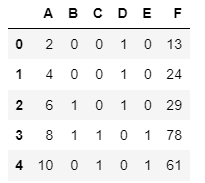

## 실습 4-2
19학번과 20학번이 아닌 학생들의 데이터프레임에서 이름을 기준으로 수강 중인 과목을 알아보기 (score_df 사용)

In [57]:
score_df

,이름,학번,과목,중간고사,기말고사,분반
0,최윤아,18,빅데이터학,50,45,1
1,최윤아,18,통계자료분석,60,75,2
2,최윤아,18,계량경제학,95,100,4
3,심규환,19,빅데이터학,70,80,1
4,심규환,19,통계자료분석,55,55,3
5,심규환,19,Data&AI,85,90,2
6,전종윤,18,빅데이터학,75,85,2
7,전종윤,18,통계자료분석,60,65,2
8,전종윤,18,Data&AI,80,95,3
9,오재은,20,통계자료분석,85,75,1


In [70]:
df1 = score_df.loc[~((score_df['학번'] == 19) | (score_df['학번'] == 20))]
df1.groupby('이름')['과목'].unique().to_frame()

,과목
이름,
김재학,"[빅데이터학, 통계자료분석, 계량경제학]"
전종윤,"[빅데이터학, 통계자료분석, Data&AI]"
최윤아,"[빅데이터학, 통계자료분석, 계량경제학]"


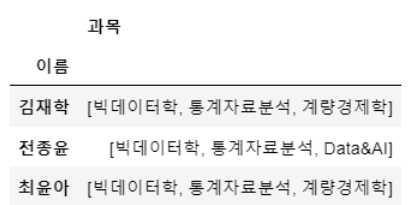

## 실습 4-3
과목별 중간고사의 count, sum, max, min, mean, median 정보를 알려주는 데이터프레임을 만들고, <br>
같은 방식으로 기말고사의 데이터프레임을 만든 뒤, 이를 병합하여 아래와 같은 결과를 도출하세요!

In [76]:
mid_term_df = score_df.groupby('과목')[['중간고사']].agg(['count', 'sum', 'max', 'min', 'mean', 'median'])
fin_term_df = score_df.groupby('과목')[['기말고사']].agg(['count', 'sum', 'max', 'min', 'mean', 'median']) 
pd.concat([fin_term_df,mid_term_df], axis=1)

기말고사                                  중간고사                          \
        count  sum  max min       mean median count  sum max min       mean   
과목                                                                            
Data&AI     5  395   95  50  79.000000   90.0     5  365  85  45  73.000000   
계량경제학       4  340  100  45  85.000000   97.5     4  315  95  40  78.750000   
빅데이터학       6  415   85  45  69.166667   75.0     6  365  75  50  60.833333   
통계자료분석      6  415   75  55  69.166667   72.5     6  390  85  55  65.000000   

                
        median  
과목              
Data&AI   80.0  
계량경제학     90.0  
빅데이터학     60.0  
통계자료분석    62.5

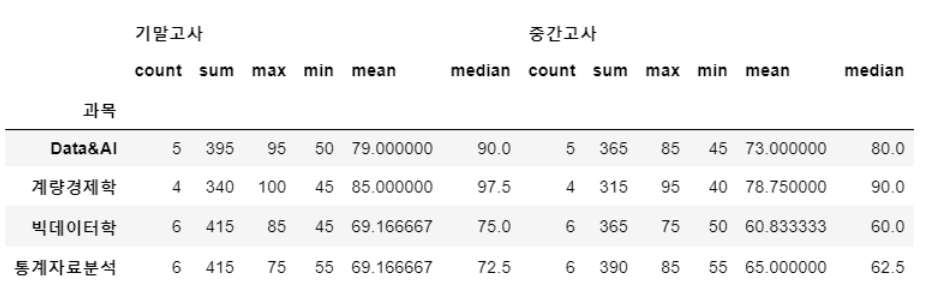

# Reference

- Pandas 공식 Document
    - https://pandas.pydata.org/docs/
- Pandas 공식 Document_10minutes Version
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
    - https://dandyrilla.github.io/2017-08-12/pandas-10min/  (한글)